# Model Comparision SVM, KNN & Decision Tree

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.svm import SVC 
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import make_pipeline
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier

In [35]:
#This is for plotting decision boundaries taken from textbook. 
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
 
    # setup marker generator and color map
    markers = ('^', 'x', 'o', 's', 'v')
    colors = ('yellow', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')


In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
df.columns = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
df.head()



,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
X = df.iloc[:, 2:31].values
y = df.iloc[:,1].values

In [17]:
df1 = datasets.load_breast_cancer()
x_1= df1.data[:, [1, 3]]
y_1= df1.target
X_train, X_test, y_train, y_test = train_test_split(x_1, y_1, test_size=0.30, random_state=1)


In [24]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

 # SVM on selected features 

Accuracy = 0.37


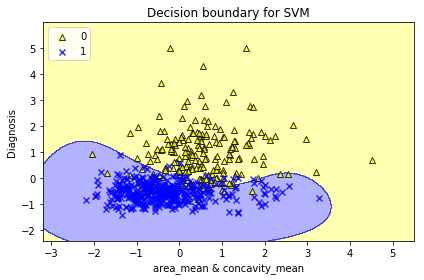

In [43]:
svm = SVC(gamma='scale', random_state=0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier =svm)
plt.title('Decision boundary for SVM')
plt.xlabel('area_mean & concavity_mean')
plt.ylabel('Diagnosis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [52]:
from sklearn.model_selection import cross_val_score
scores_svm = cross_val_score(svm, X, y, scoring='recall_macro', cv=5)  
print('Accuracy for SVM : %.3f +/- %.3f' % (np.mean(scores_svm), np.std(scores_svm)))

Accuracy for SVM : 0.926 +/- 0.023


# KNN on selected features 

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [51]:
from sklearn.model_selection import cross_val_score
scores_knn = cross_val_score(knn, X, y, scoring='recall_macro', cv=5)  
print('Accuracy for KNN : %.3f +/- %.3f' % (np.mean(scores_knn), np.std(scores_knn)))

Accuracy for KNN : 0.908 +/- 0.032


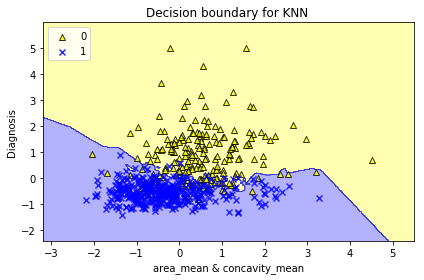

In [37]:
plot_decision_regions(X_combined_std, y_combined, classifier =knn)
plt.title('Decision boundary for KNN ')
plt.xlabel('area_mean & concavity_mean')
plt.ylabel('Diagnosis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Decision Tree on selected features 

In [29]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train_std, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
from sklearn.model_selection import cross_val_score
scores_dt = cross_val_score(dt, X, y, scoring='recall_macro', cv=5)  
print('Accuracy for Decision Tree : %.3f +/- %.3f' % (np.mean(scores_dt), np.std(scores_dt)))

Accuracy for Decision Tree : 0.924 +/- 0.017


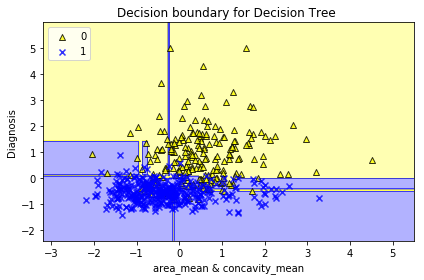

In [38]:
plot_decision_regions(X_combined_std, y_combined, classifier =dt)
plt.title('Decision boundary for Decision Tree ')
plt.xlabel('area_mean & concavity_mean')
plt.ylabel('Diagnosis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()